In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scanpy as sc

In [2]:
# !ls -l /data200T/SPACseq/HD/output/clones_with_labels.h5ad

In [3]:
meta_data = sc.read_h5ad("/data200T/SPACseq/HD/output/clones_with_labels.h5ad")

In [4]:
vars = meta_data.var_names[meta_data.var_names.str.startswith('Igh')]

In [5]:
pd.DataFrame(meta_data[:, vars].X.sum(axis=0), index=['counts'], columns=vars)

,Igha,Ighe,Ighg2c,Ighg2b,Ighg1,Ighg3,Ighd,Ighm,Ighmbp2
counts,3513.0,37.0,268.0,5299.0,433.0,796.0,4333.0,38005.0,3791.0


In [6]:
meta_data

AnnData object with n_obs × n_vars = 140665 × 20573
    obs: 'in_tissue', 'array_row', 'array_col', 'sample', 'gene_category', 'clone', 'annotations', 'cluster_cellcharter'
    var: 'gene_ids', 'feature_types', 'genome'
    obsm: 'spatial'

In [7]:
counts = {}
counts['Igha'] = (meta_data[:, ['Igha']].X.toarray().flatten() > 0).sum()
counts['Ighe'] = (meta_data[:, ['Ighe']].X.toarray().flatten() > 0).sum()
counts['Ighg'] = (meta_data[:, ['Ighg2b', 'Ighg2c', 'Ighg1']].X.toarray().flatten() > 0).sum()
counts['Ighd'] = (meta_data[:, ['Ighd']].X.toarray().flatten() > 0).sum()
counts['Ighm'] = (meta_data[:, ['Ighm', 'Ighmbp2']].X.toarray().flatten() > 0).sum()
counts

{'Igha': 1001, 'Ighe': 37, 'Ighg': 1249, 'Ighd': 3747, 'Ighm': 23181}

In [8]:
# 计算不同Ig类型之间的重叠
overlaps = {}
overlaps['Igha_Ighd'] = ((meta_data[:, ['Igha']].X.toarray().flatten() > 0) & 
                         (meta_data[:, ['Ighd']].X.toarray().flatten() > 0)).sum()
overlaps['Igha_Ighe'] = ((meta_data[:, ['Igha']].X.toarray().flatten() > 0) & 
                         (meta_data[:, ['Ighe']].X.toarray().flatten() > 0)).sum()
overlaps['Igha_Ighg'] = ((meta_data[:, ['Igha']].X.toarray().flatten() > 0) & 
                         (meta_data[:, ['Ighg2b', 'Ighg2c', 'Ighg1']].X.toarray().sum(axis=1).flatten() > 0)).sum()
overlaps['Igha_Ighm'] = ((meta_data[:, ['Igha']].X.toarray().flatten() > 0) & 
                         (meta_data[:, ['Ighm', 'Ighmbp2']].X.toarray().sum(axis=1).flatten() > 0)).sum()
overlaps['Ighd_Ighg'] = ((meta_data[:, ['Ighd']].X.toarray().flatten() > 0) & 
                         (meta_data[:, ['Ighg2b', 'Ighg2c', 'Ighg1']].X.toarray().sum(axis=1).flatten() > 0)).sum()
overlaps['Ighd_Ighe'] = ((meta_data[:, ['Ighd']].X.toarray().flatten() > 0) & 
                         (meta_data[:, ['Ighe']].X.toarray().flatten() > 0)).sum()
overlaps['Ighd_Ighm'] = ((meta_data[:, ['Ighd']].X.toarray().flatten() > 0) & 
                         (meta_data[:, ['Ighm', 'Ighmbp2']].X.toarray().sum(axis=1).flatten() > 0)).sum()
overlaps['Ighg_Ighm'] = ((meta_data[:, ['Ighg2b', 'Ighg2c', 'Ighg1']].X.toarray().sum(axis=1).flatten() > 0) & 
                         (meta_data[:, ['Ighm', 'Ighmbp2']].X.toarray().sum(axis=1).flatten() > 0)).sum()
overlaps['Ighg_Ighe'] = ((meta_data[:, ['Ighg2b', 'Ighg2c', 'Ighg1']].X.toarray().sum(axis=1).flatten() > 0) & 
                         (meta_data[:, ['Ighe']].X.toarray().flatten() > 0)).sum()
overlaps['Ighe_Ighm'] = ((meta_data[:, ['Ighe']].X.toarray().flatten() > 0) & 
                         (meta_data[:, ['Ighm', 'Ighmbp2']].X.toarray().sum(axis=1).flatten() > 0)).sum()

print("不同Ig类型之间的重叠数量:")
for k,v in overlaps.items():
    print(f"{k}: {v}")

不同Ig类型之间的重叠数量:
Igha_Ighd: 64
Igha_Ighe: 3
Igha_Ighg: 30
Igha_Ighm: 225
Ighd_Ighg: 50
Ighd_Ighe: 1
Ighd_Ighm: 1433
Ighg_Ighm: 474
Ighg_Ighe: 5
Ighe_Ighm: 7


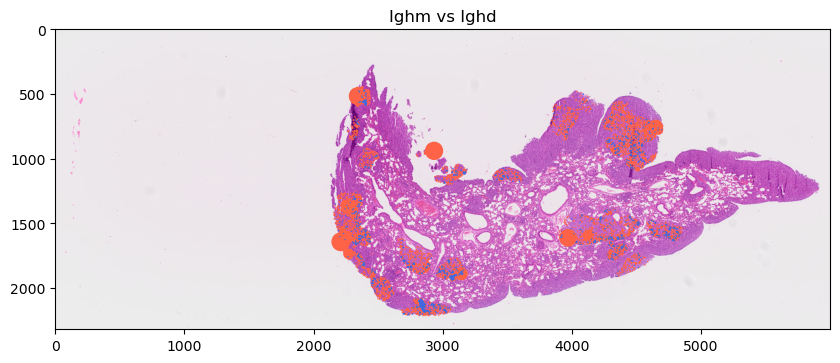

In [9]:
gene_1 = 'Ighm'
gene_2 = 'Ighd'
image_path = '/data200T/SPACseq/HD/output/992/outs/binned_outputs/square_002um/spatial/tissue_hires_image.png'
image = plt.imread(image_path)

_, ax = plt.subplots(figsize=(10, 10))
# image_cropped = image[:, image.shape[1] // 2:]  # 裁剪图像，只保留右半部分
plt.imshow(image)

scale_factors = 0.122028105

plot_data = meta_data.obs_names.str.endswith('992_2')
sns.scatterplot(x=meta_data.obsm['spatial'][plot_data, 0] * scale_factors, y=meta_data.obsm['spatial'][plot_data, 1] * scale_factors,
                s=meta_data[plot_data, gene_1].X.toarray().flatten() * 1, c='tomato', edgecolor='none')
sns.scatterplot(x=meta_data.obsm['spatial'][plot_data, 0] * scale_factors, y=meta_data.obsm['spatial'][plot_data, 1] * scale_factors,
                s=meta_data[plot_data, gene_2].X.toarray().flatten() * 1, c='royalblue', edgecolor='none')
plt.title(gene_1 + ' vs ' + gene_2)
plt.show()

In [ ]:
meta_data[:, 'B2m'].X.sum()

137032.0

# Perform SPOT analysis

In [11]:
gdata = meta_data[:, meta_data.var_names.str.startswith('sg')].copy()
del meta_data

In [13]:
from bin import utils
gdata = utils.combine_guide_replicates(gdata)

/home/wpy/stereoseq/20231128-HD/bin/utils.py:88: FutureWarning: DataFrame.groupby with axis=1 is deprecated. Do `frame.T.groupby(...)` without axis instead.
  sgs_grouped = sgs_grouped.groupby(sgs, axis=1).sum()


In [17]:
gdata.write_h5ad('/data200T/SPACseq/HD/output/clones_with_labels_combined.h5ad')

In [15]:
# read through the preprocessing 

In [14]:
cdf = pd.DataFrame(gdata.X, columns=gdata.var_names, index=gdata.obs_names)
cdf = cdf.loc[:, cdf.sum(axis=0) > 10]
cdf = pd.concat([cdf, gdata.obs.cluster_cellcharter], axis=1)
cdf

,sgAbcb1b,sgAbcc1,sgAbcc3,sgAbcc4,sgAbcc5,sgAbi1,sgActg1,sgActn1,sgAcvr1b,sgAdam15,...,sgTacstd2,sgTdgf1,sgTff3,sgTgif1,sgTspan8,sgUnc93b1,sgUtrn,sgVsig2,sgnon-targeting,cluster_cellcharter
s_008um_00359_00037-1_992_1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
s_008um_00446_00748-1_992_1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
s_008um_00356_00057-1_992_1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,2
s_008um_00482_00735-1_992_1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
s_008um_00475_00723-1_992_1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
s_008um_00226_00453-1_994,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
s_008um_00119_00201-1_994,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
s_008um_00398_00137-1_994,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
s_008um_00214_00470-1_994,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1


In [15]:
pdf = cdf.groupby('cluster_cellcharter').sum()
pdf = pdf.div(pdf.sum(axis=0), axis=1).T.dropna().T

/tmp/ipykernel_20459/1917212044.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  pdf = cdf.groupby('cluster_cellcharter').sum()


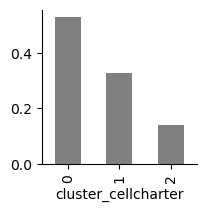

In [16]:
pdf.mean(axis=1).plot(kind='bar', figsize=(2, 2), color='gray')
sns.despine()

In [17]:
l2fc_df = pdf.div(pdf.mean(axis=1), axis=0).apply(np.log2)
l2fc_df

,sgAbcb1b,sgAbcc1,sgAbcc3,sgAbcc4,sgAbcc5,sgAbi1,sgActg1,sgActn1,sgAcvr1b,sgAdam15,...,sgStat1,sgTacstd2,sgTdgf1,sgTff3,sgTgif1,sgTspan8,sgUnc93b1,sgUtrn,sgVsig2,sgnon-targeting
cluster_cellcharter,,,,,,,,,,,,,,,,,,,,,
0,-0.943442,-0.725919,0.356778,0.669059,0.464686,-2.196493,0.066226,-0.085461,-0.612859,-3.085461,...,-0.919670,0.606416,0.592610,0.685405,0.639025,0.440607,0.481645,0.492545,0.329576,0.644415
1,0.327491,1.001872,-1.033872,-1.391485,-1.095889,0.617111,-0.174511,0.448506,0.725189,1.407864,...,0.240948,-1.514968,-1.306381,-6.559362,-1.388031,-0.235992,-1.622979,-1.439462,-0.306381,-2.071916
2,1.151272,-2.888593,0.191770,-2.183040,-0.298581,1.437587,0.125033,-1.482600,-0.372042,-1.160672,...,1.239226,-0.861112,-1.067563,0.037008,-1.546103,-inf,0.123027,-0.081808,-1.067563,-0.597881


In [19]:
from scipy.stats import chi2_contingency
chi_df = cdf.groupby('cluster_cellcharter').sum()
chi_df['sum'] = chi_df.sum(axis=1)

pval_df = pd.DataFrame(index=chi_df.index, columns=chi_df.columns)
for i in chi_df.index:
    pval_df.loc[i, :] = chi_df.apply(lambda x: chi2_contingency([[x[i] + 1, chi_df.loc[i, 'sgnon-targeting'] + 1], [x[~(chi_df.index == i)].sum(), chi_df.loc[~(chi_df.index == i), 'sgnon-targeting'].sum()]])[1], axis=0)
pval_df

/tmp/ipykernel_20459/561505337.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  chi_df = cdf.groupby('cluster_cellcharter').sum()


,sgAbcb1b,sgAbcc1,sgAbcc3,sgAbcc4,sgAbcc5,sgAbi1,sgActg1,sgActn1,sgAcvr1b,sgAdam15,...,sgTacstd2,sgTdgf1,sgTff3,sgTgif1,sgTspan8,sgUnc93b1,sgUtrn,sgVsig2,sgnon-targeting,sum
cluster_cellcharter,,,,,,,,,,,,,,,,,,,,,
0,0.0,0.0,0.0,0.272267,0.0,0.0,0.0,0.000783,0.0,0.0,...,1.0,1.0,0.364653,0.924643,0.291704,0.0,0.0,0.246199,1.0,0.0
1,0.0,0.0,0.0,0.000015,0.0,0.0,0.0,0.0,0.0,0.0,...,0.34497,0.263031,0.000016,0.001122,0.000144,0.008907,0.00006,0.003524,1.0,0.0
2,0.000052,0.245683,0.000014,0.0,0.14517,0.0,0.000002,1.0,0.315441,1.0,...,1.0,0.996943,0.010374,0.001265,0.541493,0.000001,0.000415,0.996943,1.0,0.000001


In [20]:
chi_list = chi_df.apply(lambda x: np.log10(chi2_contingency([(x + 1).tolist(), (chi_df['sgnon-targeting'] + 1).tolist()])[1]), axis=0)
chi_list.sort_values()

/tmp/ipykernel_20459/450720612.py:1: RuntimeWarning: divide by zero encountered in log10
  chi_list = chi_df.apply(lambda x: np.log10(chi2_contingency([(x + 1).tolist(), (chi_df['sgnon-targeting'] + 1).tolist()])[1]), axis=0)


sgH2-Ea                -inf
sgBlnk                 -inf
sgDsg2                 -inf
sgH2-M2                -inf
sgCd74                 -inf
                     ...   
sgGstp1           -0.065614
sgExoc7           -0.029982
sgErrfi1          -0.020255
sgSlc7a6          -0.015610
sgnon-targeting    0.000000
Length: 160, dtype: float64

In [24]:
# fig, ax = plt.subplots(1, 1, figsize=(8, 8), subplot_kw={'projection': 'polar'})

# cmap = plt.colormaps['PuOr_r']

# plot_df = pdf[chi_list.sort_values().head(50).filter(regex='^sg').index]
# # plot_df = pd.concat([plot_df, pdf.loc[:, 'sgnon-targeting']], axis=1).T
# plot_df = plot_df.T

# sorted_guides = plot_df.sort_values(1, ascending=False).index

# mean_val = np.mean(plot_df.loc[sorted_guides, :].values)
# min_val = np.min(plot_df.loc[sorted_guides, :].values)
# max_val = np.max(plot_df.loc[sorted_guides, :].values)

# radius = 0.1
# width = 0.05

# angle = 1.5 * np.pi / len(plot_df.index)
# angles = np.linspace(0.5 * np.pi + angle / 2, 2 * np.pi + angle / 2, len(plot_df.index), endpoint=False)
# for cluster in ['None'] * 0 + list(plot_df.columns):
#     if cluster != 'None':
#         guide_colors = cmap((plot_df.loc[sorted_guides, cluster].values - min_val) / (max_val - min_val))
#         bars = ax.bar(x=angles, height=width, width=angle, color=guide_colors, edgecolor='black', bottom=radius, alpha=1)  # 添加黑色网框
#     else: 
#         bars = ax.bar(x=angles, height=width, width=angle, color='none', edgecolor='black', bottom=radius)  # 添加黑色网框 
#     radius = radius + width

# ax.spines['polar'].set_visible(False)  # 去除边框
# ax.set_xticks(angles, sorted_guides, rotation=0, ha='center', fontsize=8)
# # ax.set_yticks(list(np.linspace(6 * width, 18 * width, 12)))
# ax.set_yticks([])
# ax.grid(False)  # 去除grid线

In [13]:
# fig, ax = plt.subplots(1, 1, figsize=(10, 3))

# cmap = plt.colormaps['YlGnBu']

# plot_df = pdf[chi_list.sort_values().head(50).filter(regex='^sg').index]
# # plot_df = pd.concat([plot_df, pdf.loc[:, 'sgnon-targeting']], axis=1).T
# plot_df = plot_df.T

# sorted_guides = plot_df.sort_values(1, ascending=False).index

# plot_df.loc[sorted_guides, [0, 2, 1]].plot.bar(ax=ax, cmap=cmap, stacked=True)

# plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0., frameon=False, labels=['c0', 'c2', 'c1'])
# sns.despine()

In [25]:
plot_df.sort_values(1, ascending=False).head(15)

cluster_cellcharter,0,1,2,sig
sgPon2,0.000000,1.000000,0.000000,Not significant
sgGrb7,0.000000,1.000000,0.000000,Not significant
sgDsc2,0.000000,1.000000,0.000000,Not significant
sgSlc43a3,0.002418,0.990931,0.006651,Significant
sgLaptm4b,0.031720,0.961603,0.006678,Significant
sgIfitm3,0.002015,0.959705,0.038281,Significant
sgInsr,0.043478,0.956522,0.000000,Not significant
sgSlc38a1,0.000000,0.952381,0.047619,Not significant
sgBlnk,0.041614,0.935687,0.022699,Significant
sgCd74,0.022785,0.924051,0.053165,Significant


/tmp/ipykernel_20459/3031648811.py:67: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  text.append(plt.text(x[i], y[i], txt, fontsize=8, ha='center', va='center'))
Looks like you are using a tranform that doesn't support FancyArrowPatch, using ax.annotate instead. The arrows might strike through texts. Increasing shrinkA in arrowprops might help.


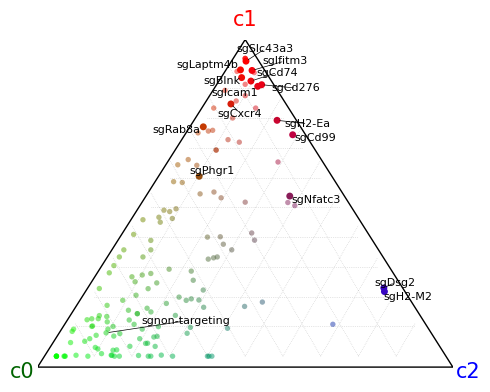

In [21]:
# 创建三角形图
fig = plt.figure(figsize=(5, 5))
ax = fig.add_subplot(111)

plot_df = pdf[chi_list.sort_values().head(500).filter(regex='^sg').index]
plot_df = plot_df.T

plot_df['sig'] = 'Not significant'
plot_df.loc[chi_list.sort_values().head(15).index, 'sig'] = 'Significant'

# 定义三角形的三个顶点坐标
corners = np.array([[-np.sqrt(3), -1], [np.sqrt(3), -1], [0, np.sqrt(3)]])

# 计算每个点的坐标
x = plot_df[0] * corners[0][0] + plot_df[2] * corners[1][0] + plot_df[1] * corners[2][0]
y = plot_df[0] * corners[0][1] + plot_df[2] * corners[1][1] + plot_df[1] * corners[2][1]

# 计算颜色映射
# 归一化三个分量的值
total = plot_df[0] + plot_df[1] + plot_df[2]
g = plot_df[0] / total  # c0 - 绿色分量
b = plot_df[2] / total  # c2 - 黄色分量 
r = plot_df[1] / total  # c1 - 红色分量

# 将RGB值组合成颜色 - 映射到红、黄、蓝
colors = np.column_stack((
    r,                  # 红色 (1,0,0)
    g,  # 黄色 (0,1,0) 
    b                   # 蓝色 (0,0,1)
))

# 添加网格线
n_lines = 10  # 每个轴的网格线数量
for i in range(1, n_lines):
    ratio = i / n_lines 
    # 平行于底边的线
    y_pos = -1 + ratio * (np.sqrt(3) + 1)
    width = 2 * np.sqrt(3) * (1 - ratio)
    x_start = -width/2
    x_end = width/2
    plt.plot([x_start, x_end], [y_pos, y_pos], 'k:', alpha=0.2, linewidth=0.5)
    
    # 平行于左边的线
    angle = np.pi/3
    x_left = -np.sqrt(3) + ratio * 2 * np.sqrt(3)
    y_bottom = -1
    length = (np.sqrt(3)) * 2 * (1 - ratio)
    plt.plot([x_left, x_left + length * np.cos(angle)],
             [y_bottom, y_bottom + length * np.sin(angle)],
             'k:', alpha=0.2, linewidth=0.5)
    
    # 平行于右边的线
    x_right = np.sqrt(3) - ratio * 2 * np.sqrt(3)
    plt.plot([x_right, x_right - length * np.cos(angle)],
             [y_bottom, y_bottom + length * np.sin(angle)],
             'k:', alpha=0.2, linewidth=0.5)

# 绘制散点
mask = plot_df['sig'] == 'Significant'
sns.scatterplot(x=x[mask], y=y[mask], s=25, c=colors[mask], edgecolor='none', ax=ax)
sns.scatterplot(x=x[~mask], y=y[~mask], s=15, c=colors[~mask], alpha=0.5, edgecolor='none', ax=ax)

# 添加标签
text = []
for i, txt in enumerate(plot_df.index):
    if plot_df.loc[txt, 'sig'] == 'Significant' or plot_df.index[i].startswith('sgnon'):
        text.append(plt.text(x[i], y[i], txt, fontsize=8, ha='center', va='center'))

import adjustText
adjustText.adjust_text(text, x, y, ax=ax, expand_points=(1, 1), expand_text=(1, 1), force_text=(0.5, 0.5), lim=1, arrowprops=dict(arrowstyle='-', color='black', lw=0.5))

# 绘制三角形边框
triangle = plt.Polygon(corners * 1.1, fill=False, color='black', lw=1)
ax.add_patch(triangle)

# 添加轴标签
ax.text(corners[0][0]-0.2, corners[0][1]-0.2, 'c0', ha='right', color='darkgreen', fontsize=15)
ax.text(corners[1][0]+0.2, corners[1][1]-0.2, 'c2', ha='left', color='blue', fontsize=15)
ax.text(corners[2][0], corners[2][1]+0.3, 'c1', ha='center', color='red', fontsize=15)

ax.set_xlim(-np.sqrt(3) * 1.1, np.sqrt(3) * 1.1)
ax.set_ylim(-1.2, np.sqrt(3) * 1.1)

# 设置图形属性
ax.set_aspect('equal')
ax.axis('off')

plt.tight_layout()
# plt.rcParams['pdf.fonttype'] = 42
# plt.savefig('./plots/metastasis_analysis_cluster_distribution.pdf', bbox_inches='tight')
plt.show()
